In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
import matplotlib.pyplot as plt

- The data has no missing values, so we can carry on

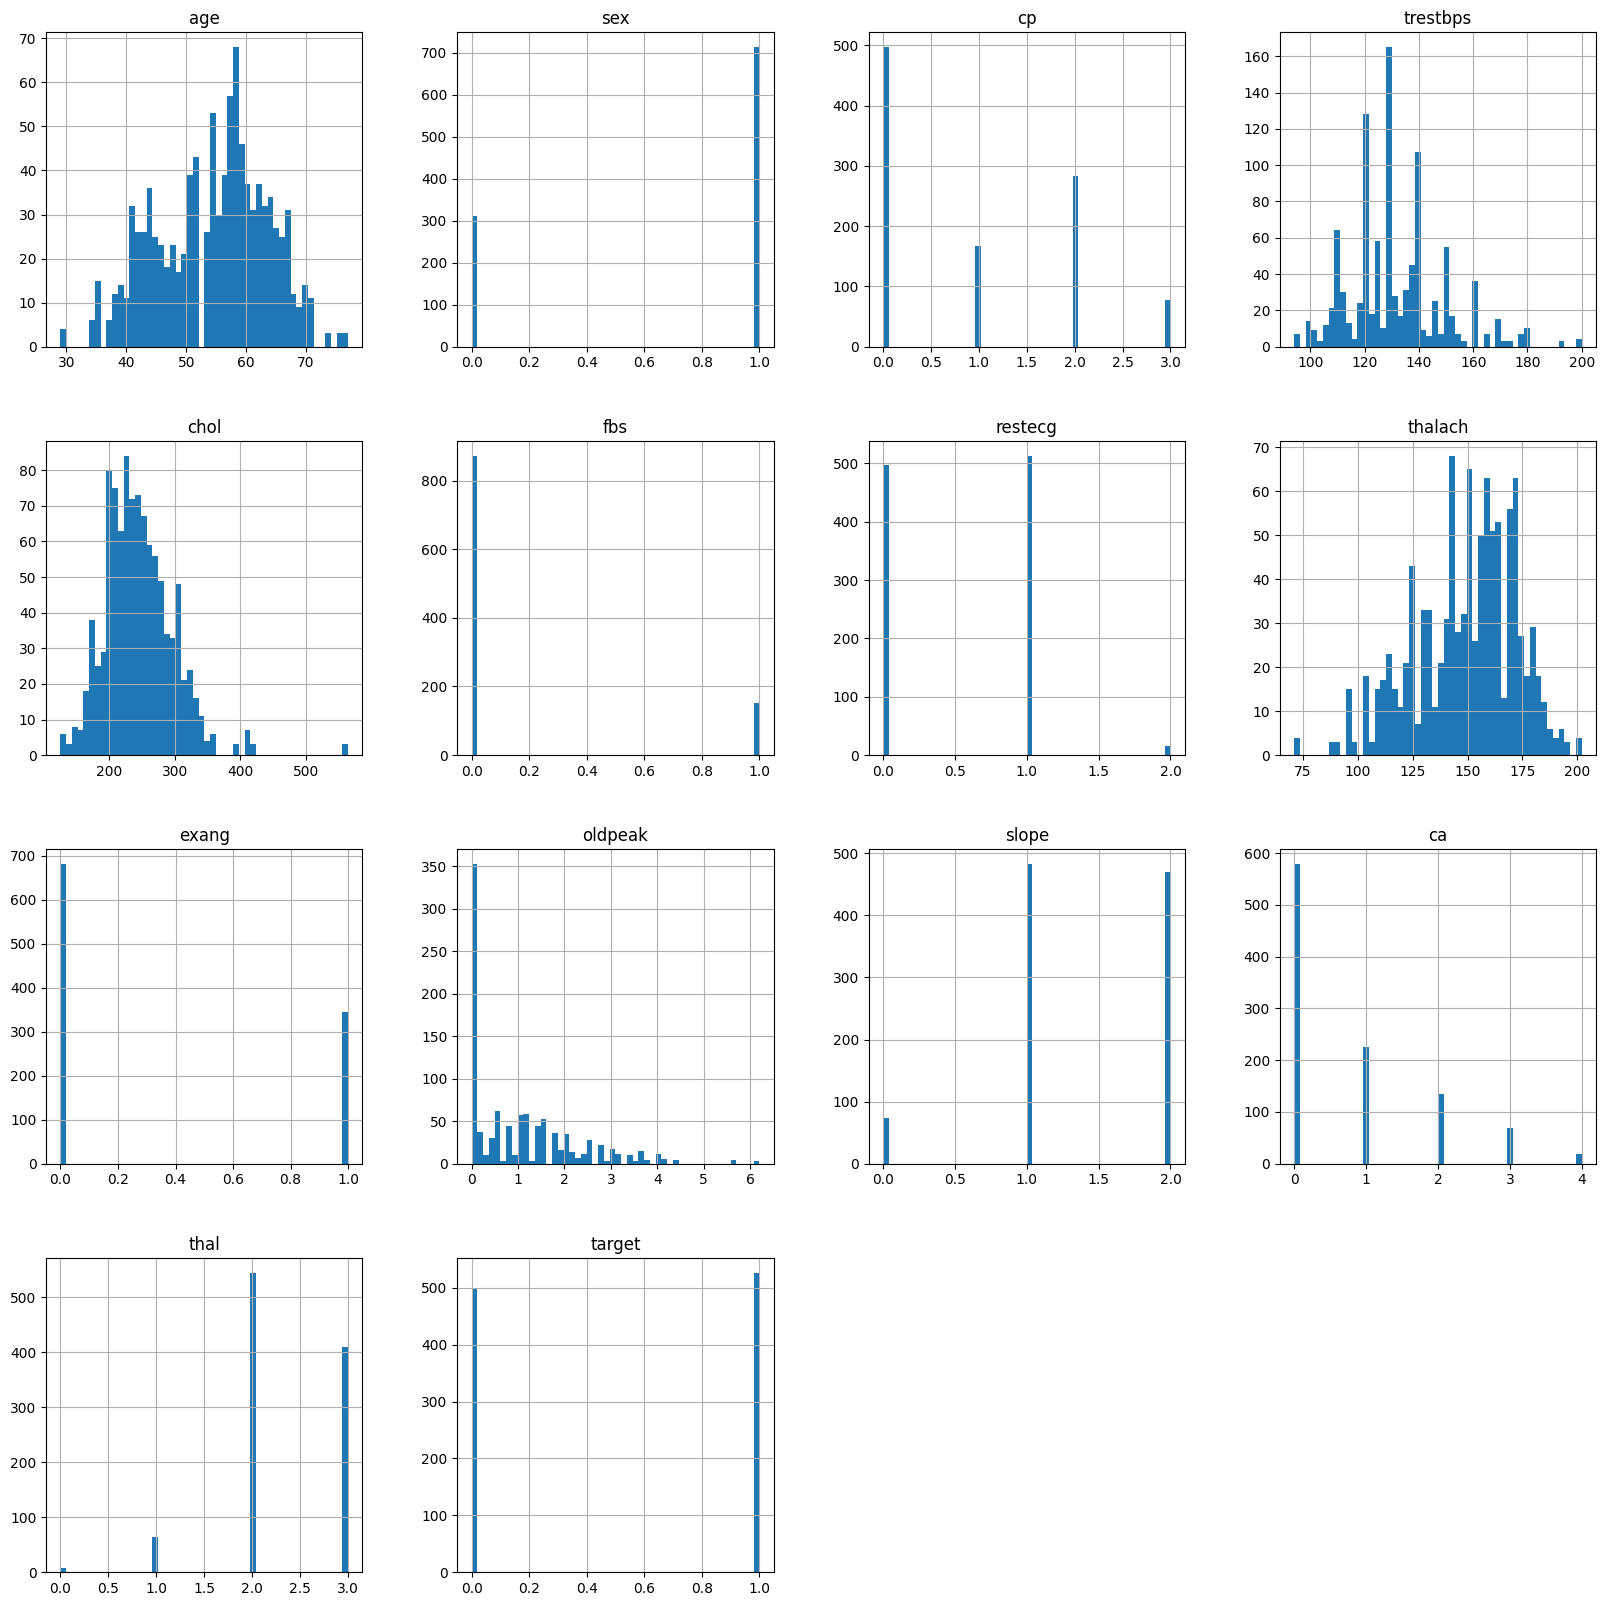

In [ ]:
df.hist(figsize = (20,20), bins = 50)
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

- Now we are going to check correlation matrix

In [ ]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending = False)

,target
target,1.000000
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


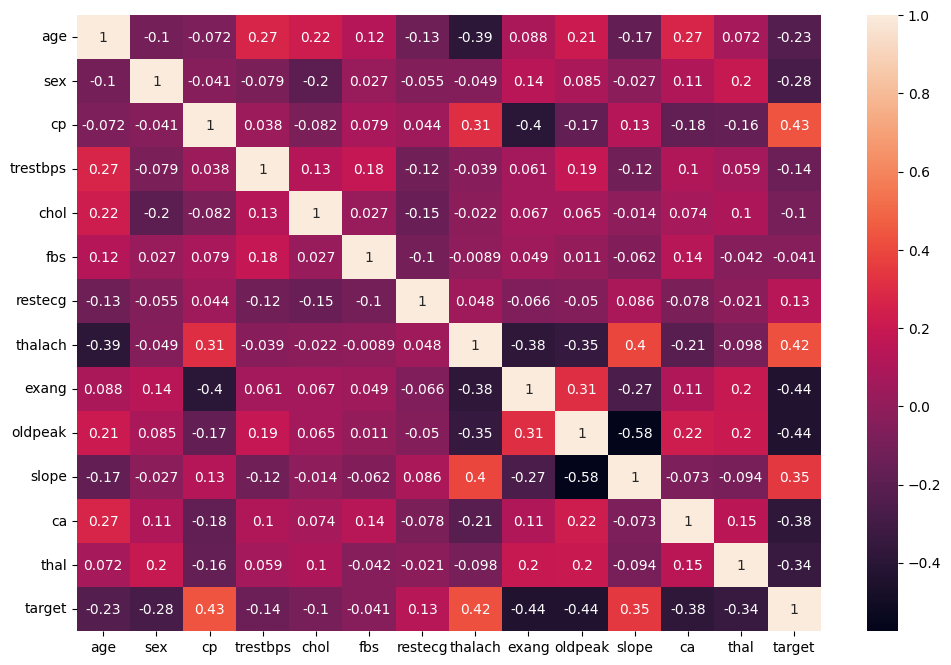

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot = True ,)
plt.show()

- It seems like apart from fbs and chol,everything has high correlation.
- But I am not going to remove those since serum cholestora(chol) and fasting blood sugar &gt (fbs) are crucial factors for heart disease.

- I am going to use random forest , XGboost and SVM )

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train ,y_test = train_test_split(X,Y,test_size = 0.25 ,random_state = 42)

In [ ]:
x_train.shape , y_train.shape , x_test.shape ,y_test.shape

((768, 13), (768,), (257, 13), (257,))

# First I am gonna start with SVM , use pipeline and do parameter tuning

In [ ]:
# We need to scale our data first and
# feed that scaled data into ML model
# for that I will use pipeline as usual
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
svm_pipe = Pipeline([
    ('std_scaler' , StandardScaler()),
    ('svm',SVC())
])

param_grid_svm = {
    'svm__C':[0.01,0.1 , 1 ,10],
    'svm__kernel':['linear', 'rbf'],
    'svm__gamma':['scale','auto' ]
}

svm_final = GridSearchCV(svm_pipe,param_grid_svm ,cv=5,scoring = 'accuracy')
svm_final.fit(x_train , y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.01, 0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
svm_best = svm_final.best_estimator_
svm_y_pred = svm_best.predict(x_test)
print('SVm accuracy', accuracy_score(y_test,svm_y_pred))
print(classification_report(y_test , svm_y_pred))

SVm accuracy 0.9688715953307393
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.98      0.95      0.97       125

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257



In [ ]:
svm_final.best_params_

{'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}

# Now Let's try with Random Forest  
- Random Forest doesn't need feature scaling so i will skip it.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

In [ ]:
param_grid = {
    'n_estimators': [200,350,500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_final = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
rf_final.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 350, 500]})

In [ ]:
rd_best = rf_final.best_estimator_
rf_y_pred = rf_final.predict(x_test)
print('RandomForest accuracy', accuracy_score(y_test,rf_y_pred))
print(classification_report(y_test , rf_y_pred))

RandomForest accuracy 0.9883268482490273
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [ ]:
rf_final.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 350}

- Looks like RandomForest might be the one !

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities for ROC AUC
svm_y_proba = svm_best.decision_function(x_test)
rf_y_proba = rd_best.predict_proba(x_test)[:, 1]

# Accuracy
svm_acc = accuracy_score(y_test, svm_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred)

print(f"SVM Model Accuracy: {svm_acc:.4f}")
print(f"Random Forest Model Accuracy: {rf_acc:.4f}")

SVM Model Accuracy: 0.9689
Random Forest Model Accuracy: 0.9883


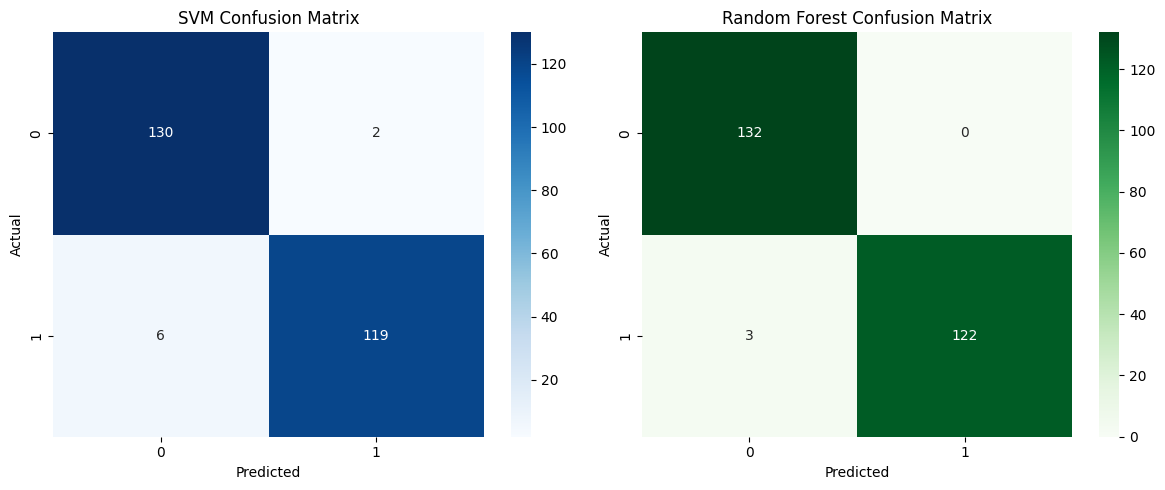

In [ ]:
# Confusion Matrices
cm_svm = confusion_matrix(y_test, svm_y_pred)
cm_rf = confusion_matrix(y_test, rf_y_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

SVM Model ROC AUC: 0.9827
Random Forest Model ROC AUC: 0.9993


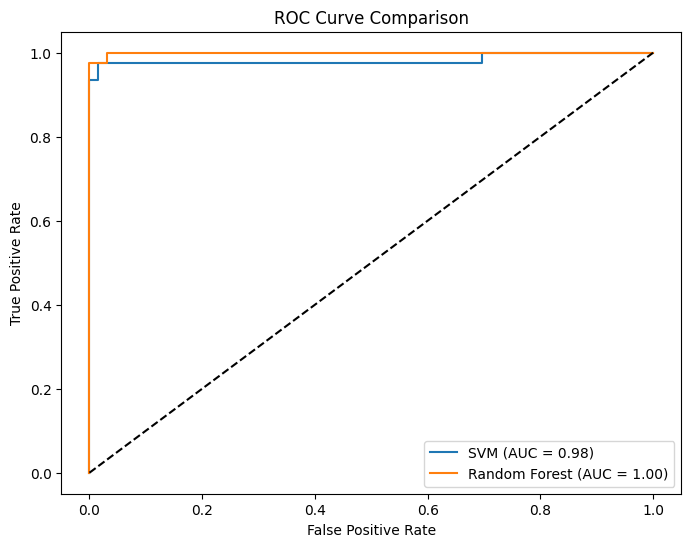

In [ ]:
# ROC AUC Scores
svm_auc = roc_auc_score(y_test, svm_y_proba)
rf_auc = roc_auc_score(y_test, rf_y_proba)

print(f"SVM Model ROC AUC: {svm_auc:.4f}")
print(f"Random Forest Model ROC AUC: {rf_auc:.4f}")

# Plot ROC Curves
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_y_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


# As we can see, Random Forest preforms better for this project!